In [25]:
import pandas as pd
import numpy as np

This notebook roughly investigates if Factor Analysis can correctly find genes in the k = 1 pathway that **DICER1** participates in.

# Preparing the data for analysis

Loading main gene dependency data:

In [26]:
df_gene_effect = pd.read_csv("preprocessed_data/20Q4v2_Achilles_gene_effect.csv")

df_gene_effect.head()

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.181332,0.089101,-0.193867,-0.024587,0.038458,-0.181824,0.351672,-0.440073,0.292582,...,-0.124218,-0.469306,NaN,NaN,0.257361,0.244834,-0.408512,0.284734,0.226412,-0.149566
1,ACH-000005,-0.076383,0.245190,0.191238,0.153008,-0.197035,-0.323295,0.252522,-0.571498,-0.068945,...,-0.212442,-0.426151,-0.068295,0.031635,0.205469,-0.068536,-0.092858,0.074640,0.028779,-0.264840
2,ACH-000007,0.102195,0.092449,-0.045926,0.171892,0.140561,0.170971,0.086060,-0.432320,0.010664,...,-0.083183,-0.269196,0.101146,0.277820,0.208814,0.001393,-0.327514,0.048714,-0.372854,-0.433157
3,ACH-000009,0.142342,-0.033126,-0.051224,0.060560,0.116002,-0.010044,0.104725,-0.610481,0.181508,...,-0.277264,-0.307018,0.044741,0.201551,0.083866,0.052208,-0.574719,0.218682,-0.074750,-0.551760
4,ACH-000011,0.280082,0.088898,0.032321,0.446598,-0.037188,-0.228207,0.110942,-0.406541,0.153979,...,-0.385241,-0.476314,-0.000984,0.013225,0.294002,0.137939,-0.245951,0.111173,-0.227417,-0.349564


DICER1 correlation data:

In [27]:
df_correlations = pd.read_csv("preprocessed_data/corr_GART_preprocessed.csv", delimiter=";")

df_correlations[:10]

,gene_selected,gene_evaluated,corr,pvalue,rank,is_on_pathway
0,GART,GART,1,0,1,1
1,GART,PAICS,0.8357685385944558,1.3994723327207264e-249,2,1
2,GART,MTHFD1,0.8305428402724535,1.0527168142140681e-243,3,1
3,GART,PFAS,0.8200228038610631,1.8353288768592636e-232,4,1
4,GART,ATIC,0.8138499189241203,3.3332104314891704e-226,5,1
5,GART,PPAT,0.7912798759100206,3.631225056702279e-205,6,1
6,GART,FPGS,0.7104087326125703,4.2811290201710145e-147,7,1
7,GART,ADSL,0.7005658423205525,2.1982103613464512e-141,8,1
8,GART,DHODH,0.6487303908116515,8.42614814074376e-115,9,0
9,GART,SDHB,0.6396059878366211,1.1939870817567485e-110,10,0


In [28]:
# TODO: Consider making gene selection even easier?

number_of_genes = 30 # Should be an even number
assert(number_of_genes % 2 == 0)
selected_columns = pd.concat([df_correlations["gene_evaluated"][:number_of_genes // 2], df_correlations["gene_evaluated"][-number_of_genes // 2:]]).to_list()
selected_columns = tuple(selected_columns)
selected_columns, len(selected_columns)

(('GART',
  'PAICS',
  'MTHFD1',
  'PFAS',
  'ATIC',
  'PPAT',
  'FPGS',
  'ADSL',
  'DHODH',
  'SDHB',
  'ADSS2',
  'NAMPT',
  'TFRC',
  'UMPS',
  'CAD',
  'ACD',
  'PRKCD',
  'PHYHIP',
  'KCNB2',
  'FAM151B',
  'MMP11',
  'MXRA8',
  'TUBA3D',
  'TMED9',
  'PCNT',
  'RGL1',
  'CCNI',
  'P2RY2',
  'PIH1D1',
  'NEK9'),
 30)

In [29]:
columns_of_interest = [column for column in df_gene_effect.columns if column.split(" ")[0] in selected_columns]
if not len(selected_columns) == len(columns_of_interest): # Rough automatic check for whether we found all corresponding columns in gene_effect dataset that we've selected.
    print(f"WARNING: {len(selected_columns) - len(columns_of_interest)} column(s) where not found in the dataset.")
columns_of_interest, len(columns_of_interest)

(['ACD (65057)',
  'ADSL (158)',
  'ATIC (471)',
  'CAD (790)',
  'CCNI (10983)',
  'DHODH (1723)',
  'FAM151B (167555)',
  'FPGS (2356)',
  'GART (2618)',
  'KCNB2 (9312)',
  'MMP11 (4320)',
  'MTHFD1 (4522)',
  'MXRA8 (54587)',
  'NAMPT (10135)',
  'NEK9 (91754)',
  'P2RY2 (5029)',
  'PAICS (10606)',
  'PCNT (5116)',
  'PFAS (5198)',
  'PHYHIP (9796)',
  'PIH1D1 (55011)',
  'PPAT (5471)',
  'PRKCD (5580)',
  'RGL1 (23179)',
  'SDHB (6390)',
  'TFRC (7037)',
  'TMED9 (54732)',
  'TUBA3D (113457)',
  'UMPS (7372)'],
 29)

In [30]:
df_gene_effect[columns_of_interest]

,ACD (65057),ADSL (158),ATIC (471),CAD (790),CCNI (10983),DHODH (1723),FAM151B (167555),FPGS (2356),GART (2618),KCNB2 (9312),...,PHYHIP (9796),PIH1D1 (55011),PPAT (5471),PRKCD (5580),RGL1 (23179),SDHB (6390),TFRC (7037),TMED9 (54732),TUBA3D (113457),UMPS (7372)
0,-0.806253,-1.596759,-0.739520,-1.005114,0.078964,-1.477131,-0.020280,-1.096059,-0.464176,0.212924,...,-0.060927,0.015825,-0.766264,-0.268208,0.275410,-0.894783,-1.421941,0.088113,-0.366829,-0.957078
1,-0.841503,-2.034402,-0.725101,-0.755274,-0.235176,-1.058889,0.063740,-1.031511,-0.894343,0.393311,...,0.142993,-0.103573,-1.277637,-0.043270,-0.204180,-0.949081,-1.509925,-0.174698,-0.168177,-1.122615
2,-0.348997,-1.222208,-0.845033,-0.328129,-0.005609,-0.720187,0.082041,-0.353715,-0.706659,0.247242,...,0.009290,0.107765,-0.607689,-0.047426,0.036762,-0.916764,-1.323047,-0.311737,-0.445893,-0.834037
3,-0.433697,-1.247635,-0.576957,-0.327673,-0.201326,-0.558100,-0.004092,-0.369323,-0.369104,0.307977,...,0.172647,-0.154417,-0.546790,-0.158498,0.007934,-0.538930,-1.293633,-0.457483,-0.537479,-0.670182
4,-0.923459,-1.146202,-0.496128,-0.552979,-0.188211,-0.725848,0.113195,-0.872680,-0.274540,0.326391,...,-0.063285,0.053964,-0.809917,-0.071762,0.157805,-0.753028,-0.923048,-0.155264,-0.516754,-0.496930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,-0.746739,-0.423947,-0.012357,-0.013812,-0.431108,-0.338099,0.005067,-0.302045,0.249184,0.151511,...,0.015270,0.039329,-0.169218,-0.041216,-0.125891,0.186013,-0.266680,-0.269412,-0.217691,-0.106629
804,-0.754889,-0.623534,-0.335757,-0.152030,-0.718520,-0.656531,-0.044590,-0.329197,0.052761,0.162650,...,-0.056621,0.178183,-0.383387,0.055634,0.027884,-0.058769,-0.396068,-0.425417,-0.035615,-0.319362
805,-0.535354,-0.359391,-0.339175,0.011403,-0.427153,-0.286382,-0.202848,-0.237293,0.301138,0.093672,...,-0.131622,0.123237,-0.240727,0.161425,0.087424,0.466871,-0.382071,-0.364988,-0.224268,0.117058
806,-0.422583,-0.274565,-0.328226,-0.214093,-0.112775,-0.370183,-0.083603,-0.422838,-0.118585,0.292301,...,-0.031193,-0.282352,-0.386366,-0.269151,0.087367,-0.184681,-0.461887,-0.757949,-0.335418,-0.469779


In [31]:
X = df_gene_effect[columns_of_interest].dropna() # Is dropping rows with na a good idea? Maybe use mean value instead?
X = X.to_numpy()
if 808 - X.shape[0] > 0:
    print(f"Warning: {808 - X.shape[0]} rows contained at least 1 NA and was dropped.")
X.shape

(796, 29)

# Analysis

In [32]:
import sys
import os

# Get the current working directory (where the notebook is running)
notebook_dir = os.getcwd()

# Go up one level to the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Now you can import your module
from utils import factor_model_solution, factor_goodness_of_fit_test

In [33]:
_, lambda_hat = factor_model_solution(X, k = 1)
lambda_hat

array([[-0.03854149],
       [ 0.7920736 ],
       [ 0.87462066],
       [ 0.67004815],
       [-0.01999228],
       [ 0.71796313],
       [-0.04033781],
       [ 0.7256091 ],
       [ 0.8740995 ],
       [ 0.08743628],
       [ 0.02650947],
       [ 0.84566689],
       [ 0.01177721],
       [ 0.65242746],
       [-0.10332524],
       [ 0.03110052],
       [ 0.90329961],
       [-0.14237832],
       [ 0.82962023],
       [-0.03661791],
       [-0.07427188],
       [ 0.86717951],
       [-0.0509147 ],
       [-0.0770157 ],
       [ 0.6638888 ],
       [ 0.67225347],
       [-0.08014586],
       [-0.00156868],
       [ 0.70156517]])

In [34]:
pd.concat([df_correlations[["gene_evaluated", "is_on_pathway"]][:number_of_genes // 2], df_correlations[["gene_evaluated", "is_on_pathway"]][-number_of_genes // 2:]])

,gene_evaluated,is_on_pathway
0,GART,1
1,PAICS,1
2,MTHFD1,1
3,PFAS,1
4,ATIC,1
5,PPAT,1
6,FPGS,1
7,ADSL,1
8,DHODH,0
9,SDHB,0


In [35]:
columns_of_interest

['ACD (65057)',
 'ADSL (158)',
 'ATIC (471)',
 'CAD (790)',
 'CCNI (10983)',
 'DHODH (1723)',
 'FAM151B (167555)',
 'FPGS (2356)',
 'GART (2618)',
 'KCNB2 (9312)',
 'MMP11 (4320)',
 'MTHFD1 (4522)',
 'MXRA8 (54587)',
 'NAMPT (10135)',
 'NEK9 (91754)',
 'P2RY2 (5029)',
 'PAICS (10606)',
 'PCNT (5116)',
 'PFAS (5198)',
 'PHYHIP (9796)',
 'PIH1D1 (55011)',
 'PPAT (5471)',
 'PRKCD (5580)',
 'RGL1 (23179)',
 'SDHB (6390)',
 'TFRC (7037)',
 'TMED9 (54732)',
 'TUBA3D (113457)',
 'UMPS (7372)']

In [36]:
loadings = lambda_hat.T[0] # Extract loadings as a list

# Extract gene names (everything before the space)
genes = [column.split(" ")[0] for column in columns_of_interest]

# Create a DataFrame from genes and values
df_values = pd.DataFrame({
    'gene_evaluated': genes,
    'loadings': loadings
})

# Merge with df_correlations on 'gene'
merged_df = df_values.merge(df_correlations[['gene_evaluated', 'is_on_pathway']], on='gene_evaluated', how='left')

print(merged_df.sort_values("loadings", ascending=False))


   gene_evaluated  loadings  is_on_pathway
16          PAICS  0.903300              1
2            ATIC  0.874621              1
8            GART  0.874100              1
21           PPAT  0.867180              1
11         MTHFD1  0.845667              1
18           PFAS  0.829620              1
1            ADSL  0.792074              1
7            FPGS  0.725609              1
5           DHODH  0.717963              0
28           UMPS  0.701565              0
25           TFRC  0.672253              0
3             CAD  0.670048              0
24           SDHB  0.663889              0
13          NAMPT  0.652427              0
9           KCNB2  0.087436              0
15          P2RY2  0.031101              0
10          MMP11  0.026509              0
12          MXRA8  0.011777              0
27         TUBA3D -0.001569              0
4            CCNI -0.019992              0
19         PHYHIP -0.036618              0
0             ACD -0.038541              0
6         F

We get heavier loadings on genes that actually lie on the pathway!!

In [37]:
factor_goodness_of_fit_test(X, k = 1)

1.1500577617445796e-183

Test shows that k = 1 **is not** sufficient to describe (**all**) the data. But sufficient to **only** capture the (single) pathway perhaps?

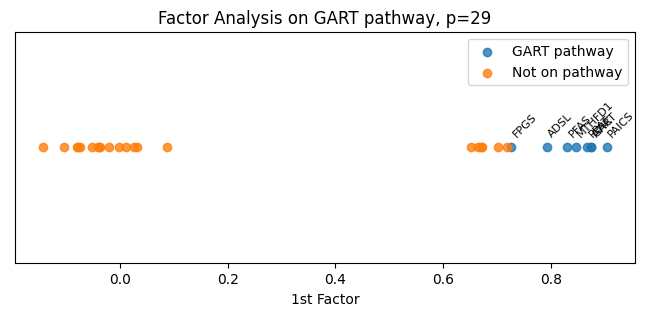

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))

for category_num, label in [(1, "GART pathway"), (0, "Not on pathway")]:
    subset = merged_df[merged_df['is_on_pathway'] == category_num]
    plt.scatter(subset['loadings'], np.zeros(len(subset)), label=label, alpha=0.8)

    if category_num == 0:
        continue
    for _, row in subset.iterrows():
        plt.text(row['loadings'], 0.005, row['gene_evaluated'], 
                 fontsize=8, alpha=1, rotation=45)

plt.title("Factor Analysis on GART pathway, p=" + str(len(columns_of_interest)))
plt.legend()
plt.xlabel("1st Factor")
plt.yticks([])
plt.show()

cycle:	1	theta:	70.0	pair:	(0, 1)	objective:	7.413079955711803
cycle:	2	theta:	0.0	pair:	(0, 1)	objective:	7.413079955711803
Phi has converged; Algorithm ending early.


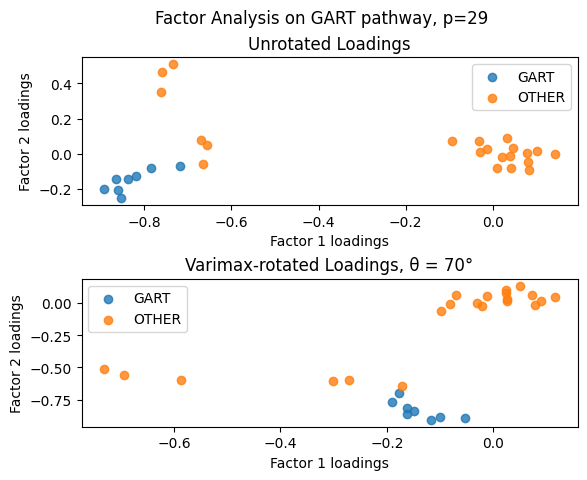

In [43]:
from utils import varimax

_, lambda_hat = factor_model_solution(X, k = 2)

loadings = lambda_hat.T # Extract loadings as a list

# Extract gene names (everything before the space)
genes = [column.split(" ")[0] for column in columns_of_interest] 

# Create a DataFrame from genes and values
df_values = pd.DataFrame({
    'gene_evaluated': genes,
    'loadings0': loadings[0],
    'loadings1': loadings[1]
})

# Merge with df_correlations on 'gene'
merged_df = (df_values
             .merge(df_correlations[['gene_evaluated', 'is_on_pathway']], on='gene_evaluated', how='left')
             .rename(columns={"is_on_pathway": "is_on_pathway_GART"})
             )


colors = []
for d in merged_df['is_on_pathway_GART']:
    if d == 1:
        colors.append("GART")
        continue

    colors.append("OTHER")

merged_df['category'] = colors

rotated_lambda = varimax(np.array([merged_df['loadings0'], merged_df['loadings1']]).T, verbose=True)
rotated_df = merged_df.copy()
rotated_df['loadings0'] = rotated_lambda[:,0]
rotated_df['loadings1'] = rotated_lambda[:,1]
rotated_df

fig, ax = plt.subplots(2, 1)

for label in ["GART", "OTHER"]:
    subset = merged_df[merged_df['category'] == label]
    ax[0].scatter(subset['loadings0'], subset['loadings1'], label=label, alpha=.8)
ax[0].set_title("Unrotated Loadings")
ax[0].legend()
ax[0].set_xlabel("Factor 1 loadings")
ax[0].set_ylabel("Factor 2 loadings")

for label in ["GART", "OTHER"]:
    subset = rotated_df[rotated_df['category'] == label]
    ax[1].scatter(subset['loadings0'], subset['loadings1'], label=label, alpha=.8)
ax[1].set_title("Varimax-rotated Loadings, θ = 70°")
ax[1].legend()
ax[1].set_ylabel("Factor 2 loadings")
ax[1].set_xlabel("Factor 1 loadings")


fig.suptitle("Factor Analysis on GART pathway, p=" + str(len(columns_of_interest)))
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between plots
plt.show()
